### Nessa análise, serão avalidas apenas algumas empresas dos setores:
- Energia
- Financeiro
- Exploração
- Materiais Básicos
- Bens industriais
- Saúde
- Consumo não cíclico

#### Seleção das bibliotecas e DataSets

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

In [6]:
import seaborn as sns

**Os dados podem estar inconsistentes em alguns casos, visto que principalmente o símbolo das ações alteram ao longo do tempo, 
assim como empresas deixam de existir, ou "entram" na bolsa em momentos diferentes**

In [4]:
columns = ['Date', 'Symbol', 'Close']
df = pd.read_csv('bovespa_stocks.csv', 
                  usecols=columns)
df.rename(columns={'Close': 'Valor'}, inplace=True)
df

,Date,Symbol,Valor
0,2022-10-03,SMAB11,8.360000
1,2010-01-04,MMXM3,1599.174927
2,2010-01-05,MMXM3,1609.240479
3,2010-01-06,MMXM3,1680.958008
4,2010-01-07,MMXM3,1698.572876
...,...,...,...
894771,2022-12-16 00:00:00,G3,5.550000
894772,2022-12-16 00:00:00,I4,8.030000
894773,2022-12-16 00:00:00,L3,6.860000
894774,2022-12-16 00:00:00,P3,21.230000


**Os indicadores podem não ter os dados corretos, devido a auto fill para poder fazer as correlações**

In [8]:
df2 = pd.read_csv('economic_indicators.csv')
df2.ffill(inplace=True)
df2.bfill(inplace=True)
df2

,Date,Taxa Selic,IPCA,IGP-M,INPC,Desemprego PNADC
0,2010-01-01,8.75,0.75,0.63,0.88,8.0
1,2010-01-02,8.75,0.75,0.63,0.88,8.0
2,2010-01-03,8.75,0.75,0.63,0.88,8.0
3,2010-01-04,8.75,0.75,0.63,0.88,8.0
4,2010-01-05,8.75,0.75,0.63,0.88,8.0
...,...,...,...,...,...,...
4807,2023-03-01,13.75,0.53,-0.06,0.46,8.1
4808,2023-03-02,13.75,0.53,-0.06,0.46,8.1
4809,2023-03-03,13.75,0.53,-0.06,0.46,8.1
4810,2023-03-04,13.75,0.53,-0.06,0.46,8.1


### Manipulando os DataSets

**Definindo os setores e empresas de cada setor a setem analisadas**

In [9]:
setores = {
    'Energia': ['EGIE3', 'TAEE11', 'CMIG4'],
    'Financeiro': ['ITUB4', 'BBDC4', 'BBAS3'],
    'Exploração': ['PETR4', 'ENAT3', 'PRIO3'],
    'Materiais básicos': ['VALE5', 'KLBN11', 'BRKM5'],
    'Bens industriais': ['RAPT3', 'BRFS3', 'GOAU4'],
    'Saúde': ['FLRY3', 'AALR3', 'RADL3'],
    'Consumo não cíclico': ['MDIA3', 'JBSS3', 'SMTO3']
}

**Inserindo o setor das empresas escolhidas**

In [10]:
def nova_funcao(itens):
    for setor, empresas in setores.items():
        if itens in empresas:
            return setor
        else:
            continue

df['Setor'] = df['Symbol'].apply(nova_funcao)
df

,Date,Symbol,Valor,Setor
0,2022-10-03,SMAB11,8.360000,None
1,2010-01-04,MMXM3,1599.174927,None
2,2010-01-05,MMXM3,1609.240479,None
3,2010-01-06,MMXM3,1680.958008,None
4,2010-01-07,MMXM3,1698.572876,None
...,...,...,...,...
894771,2022-12-16 00:00:00,G3,5.550000,None
894772,2022-12-16 00:00:00,I4,8.030000,None
894773,2022-12-16 00:00:00,L3,6.860000,None
894774,2022-12-16 00:00:00,P3,21.230000,None


**Atualizando o formato das datas das tabelas**

In [11]:
df['Date'] = pd.to_datetime(df.Date, format='%Y-%m-%d', utc=True)
df

,Date,Symbol,Valor,Setor
0,2022-10-03 00:00:00+00:00,SMAB11,8.360000,None
1,2010-01-04 00:00:00+00:00,MMXM3,1599.174927,None
2,2010-01-05 00:00:00+00:00,MMXM3,1609.240479,None
3,2010-01-06 00:00:00+00:00,MMXM3,1680.958008,None
4,2010-01-07 00:00:00+00:00,MMXM3,1698.572876,None
...,...,...,...,...
894771,2022-12-16 00:00:00+00:00,G3,5.550000,None
894772,2022-12-16 00:00:00+00:00,I4,8.030000,None
894773,2022-12-16 00:00:00+00:00,L3,6.860000,None
894774,2022-12-16 00:00:00+00:00,P3,21.230000,None


In [12]:
df2['Date'] = pd.to_datetime(df2.Date, format='%Y-%m-%d', utc=True)
df2

,Date,Taxa Selic,IPCA,IGP-M,INPC,Desemprego PNADC
0,2010-01-01 00:00:00+00:00,8.75,0.75,0.63,0.88,8.0
1,2010-01-02 00:00:00+00:00,8.75,0.75,0.63,0.88,8.0
2,2010-01-03 00:00:00+00:00,8.75,0.75,0.63,0.88,8.0
3,2010-01-04 00:00:00+00:00,8.75,0.75,0.63,0.88,8.0
4,2010-01-05 00:00:00+00:00,8.75,0.75,0.63,0.88,8.0
...,...,...,...,...,...,...
4807,2023-03-01 00:00:00+00:00,13.75,0.53,-0.06,0.46,8.1
4808,2023-03-02 00:00:00+00:00,13.75,0.53,-0.06,0.46,8.1
4809,2023-03-03 00:00:00+00:00,13.75,0.53,-0.06,0.46,8.1
4810,2023-03-04 00:00:00+00:00,13.75,0.53,-0.06,0.46,8.1


**Juntando as tabelas de acordo com a data**

In [14]:
df = df.merge(df2, on='Date')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 857045 entries, 0 to 857044
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   Date              857045 non-null  datetime64[ns, UTC]
 1   Symbol            857045 non-null  object             
 2   Valor             857045 non-null  float64            
 3   Setor             63634 non-null   object             
 4   Taxa Selic        857045 non-null  float64            
 5   IPCA              857045 non-null  float64            
 6   IGP-M             857045 non-null  float64            
 7   INPC              857045 non-null  float64            
 8   Desemprego PNADC  857045 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6), object(2)
memory usage: 65.4+ MB


**Funções que poderiam ser utilizadas para montar os gráficos**

In [17]:
def dubplots(setor):
    fig, axes = plt.subplots(nrows=1, ncols=len(setores[setor]))
    cont = 0
    for symbol in setores[setor]:
        df[df['Symbol']==symbol].plot(x='Date', y='Valor',
                                      ax=axes[cont],
                                      figsize=(20,5))
        axes[cont].set_title(symbol)
        cont += 1

In [18]:
def subplotlys(setor):
    annotations = []
    annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text=f'Setor - {setor}',
                              font=dict(family='Arial',
                                        size=30,
                                        color='rgb(37,37,37)'),
                              showarrow=False))
    
    df2 = df[df['Setor'] == setor]
    fig = px.line(df2, x='Date', y='Valor', color='Symbol', )
    fig.update_layout(annotations=annotations)
    fig.show()

    # Esse código comentado apresenta subplots, porém não exibe todo o intervalo

    # fig = make_subplots(rows=1, cols=3, 
    #                     row_heights=[0.5], 
    #                     subplot_titles=tuple(setores[setor]))
    # for symbol in setores[setor]:
    #     fig.add_trace(go.Scatter(x = df2.Date.sort_values(), 
    #                              y = df2[df2['Symbol']==symbol]['Valor'],
    #                              name = symbol),
    #                   row = 1,
    #                   col = cont)
    #     cont += 1
        # fig.update_xave
    
    # fig.update_layout(height=400, width=1000)
    # fig.show()

### Multivariada

#### Correlação

**Correlação entre os indicadores econômicos e o valor das ações**

In [19]:
df.corr()

C:\Users\lfoliveira\AppData\Local\Temp\ipykernel_17596\1134722465.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Valor,Taxa Selic,IPCA,IGP-M,INPC,Desemprego PNADC
Valor,1.000000,0.008492,0.005884,-0.001469,0.006309,-0.049267
Taxa Selic,0.008492,1.000000,-0.018504,-0.438826,-0.042274,-0.557256
IPCA,0.005884,-0.018504,1.000000,0.402643,0.973330,-0.040356
IGP-M,-0.001469,-0.438826,0.402643,1.000000,0.446102,0.335730
INPC,0.006309,-0.042274,0.973330,0.446102,1.000000,-0.026382
Desemprego PNADC,-0.049267,-0.557256,-0.040356,0.335730,-0.026382,1.000000


**Visualização da tabela de correlação**

C:\Users\lfoliveira\AppData\Local\Temp\ipykernel_17596\601794128.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

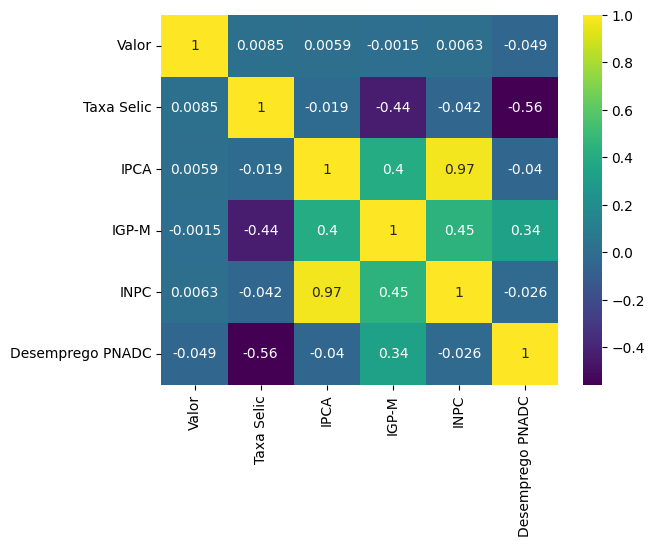

In [20]:
sns.heatmap(df.corr(), cmap='viridis', annot=True)